In [1]:
from datetime import datetime, timedelta
start_date = datetime.now()-timedelta(days=365*10)
end_date = datetime.now()

In [2]:
import pandas as pd
from jqdata import macro
q = query(macro.MAC_MANUFACTURING_PMI.stat_month,
          macro.MAC_MANUFACTURING_PMI.pmi,
        ).filter(macro.MAC_MANUFACTURING_PMI.stat_month>start_date.strftime('%Y-%m')) \
    .order_by(macro.MAC_MANUFACTURING_PMI.stat_month.asc())
df = macro.run_query(q)
df.rename(columns={'stat_month':'date'},inplace=True)
df['date'] = pd.to_datetime(df['date'],format="%Y-%m")
df.set_index('date', inplace=True)
df.head()

,pmi
date,
2011-04-01,52.9
2011-05-01,52.0
2011-06-01,50.9
2011-07-01,50.7
2011-08-01,50.9


In [3]:
df1  = get_price(['000300.XSHG'], 
               start_date = start_date, 
               end_date = end_date, 
               frequency='5d',
               fields=['close','volume'], 
               skip_paused=False,
               fq='pre',panel=False)
df1.rename(columns={'time':'date'},inplace=True)
df1['date'] = pd.to_datetime(df1['date'],format="%Y-%m")
df1.set_index('date', inplace=True)
del df1['code']
df1.rename(columns={'close':'价格', 'volume':'成交量'},inplace=True)
df1 = df1.resample("MS", closed='left').mean()
df1.head()

,价格,成交量
date,,
2011-03-01,3290.570,3.752108e+10
2011-04-01,3297.090,4.042347e+10
2011-05-01,3081.685,2.425341e+10
2011-06-01,2959.315,2.216230e+10
2011-07-01,3065.576,2.802144e+10


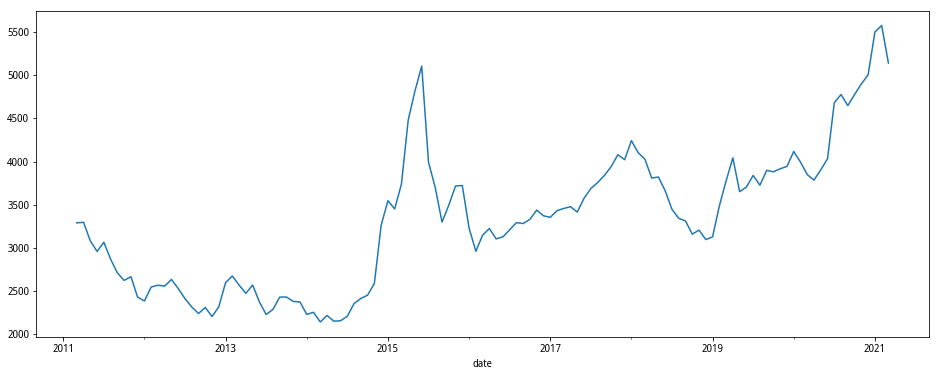

In [4]:
df1['价格'].plot(figsize=(16,6))

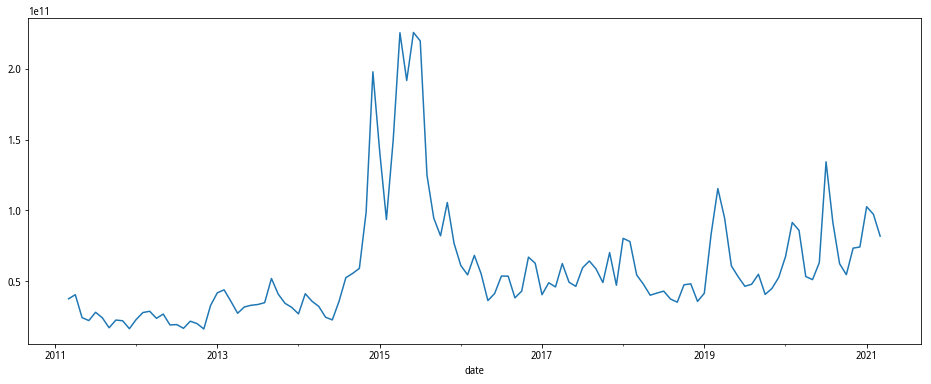

In [5]:
df1['成交量'].plot(figsize=(16,6))

In [6]:
df['pmi波动'] = ((df['pmi']-df['pmi'].shift(periods=1,axis=0))/df['pmi'])
df.head()

,pmi,pmi波动
date,,
2011-04-01,52.9,NaN
2011-05-01,52.0,-0.017308
2011-06-01,50.9,-0.021611
2011-07-01,50.7,-0.003945
2011-08-01,50.9,0.003929


In [8]:
df1['价格波动'] = ((df1['价格']-df1['价格'].shift(periods=1,axis=0))/df1['价格'])
df1['成交量波动'] = ((df1['成交量']-df1['成交量'].shift(periods=1,axis=0))/df1['成交量'])
df1.head()

,价格,成交量,价格波动,成交量波动
date,,,,
2011-03-01,3290.570,3.752108e+10,NaN,NaN
2011-04-01,3297.090,4.042347e+10,0.001978,0.071800
2011-05-01,3081.685,2.425341e+10,-0.069898,-0.666713
2011-06-01,2959.315,2.216230e+10,-0.041351,-0.094355
2011-07-01,3065.576,2.802144e+10,0.034663,0.209095


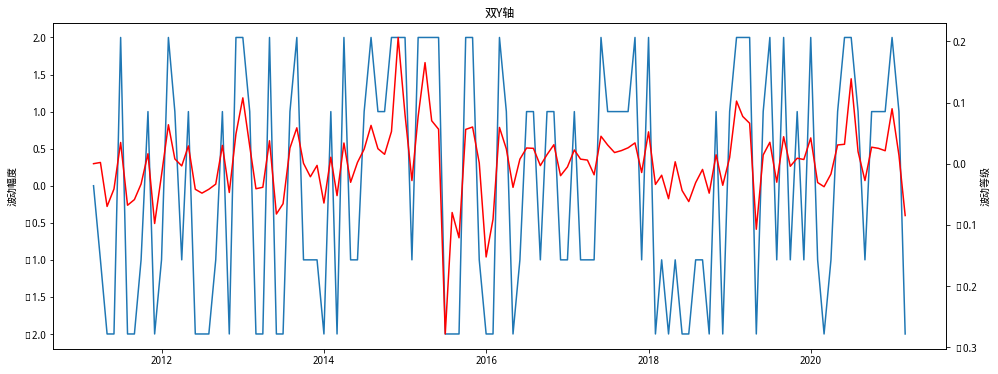

In [30]:
x = df1.index
y1 = pd.qcut(df1['价格波动'],[0, 0.25, 0.5, 0.75, 1],labels=[-2,-1,1,2]).astype(float).fillna(0)
y2 = df1['价格波动'].fillna(0)

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('波动幅度')
ax1.set_title("双Y轴")

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r')
ax2.set_ylabel('波动等级')

plt.show()


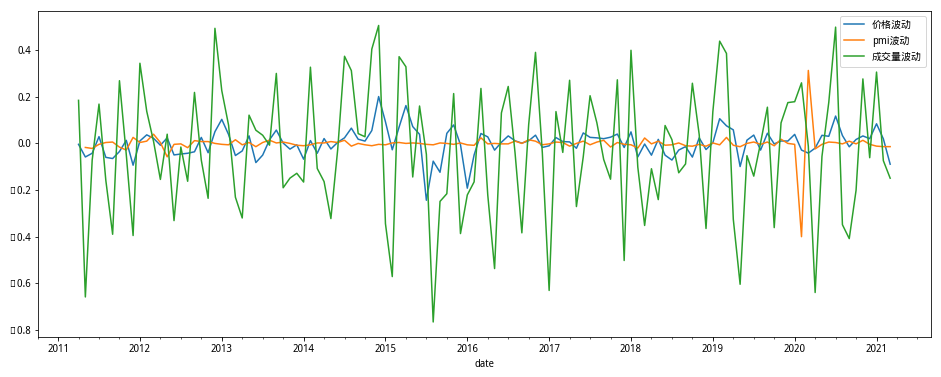

In [241]:
df2 = pd.concat([df,df1],axis=1).fillna(method='pad',axis=0)
df2[['价格波动','pmi波动','成交量波动']].plot(figsize=(16,6))

In [242]:
df2[['价格波动','pmi波动','成交量波动']].corr()

,价格波动,pmi波动,成交量波动
价格波动,1.000000,0.024195,0.501310
pmi波动,0.024195,1.000000,-0.045488
成交量波动,0.501310,-0.045488,1.000000


In [264]:
df2['价格波动级别'] = pd.qcut(df2['价格波动'],[0, 0.25, 0.5, 0.75, 1],labels=[1,2,3,4])
df2['价格大幅下跌'] = df2['价格波动'].apply(lambda x: 1 if x < 0 else 0)
df2.head()

,pmi,pmi波动,价格,成交量,价格波动,成交量波动,价格波动级别,价格大幅下跌,上月pmi,上月成交量
date,,,,,,,,,,
2011-03-01,NaN,NaN,3294.4800,3.366315e+10,NaN,NaN,NaN,0,NaN,NaN
2011-04-01,52.9,NaN,3281.5675,4.130449e+10,-0.003935,0.185000,2.0,1,NaN,3.366315e+10
2011-05-01,52.0,-0.017308,3100.9600,2.488940e+10,-0.058242,-0.659521,1.0,1,52.9,4.130449e+10
2011-06-01,50.9,-0.021611,2975.0720,2.321714e+10,-0.042314,-0.072027,1.0,1,52.0,2.488940e+10
2011-07-01,50.7,-0.003945,3064.3900,2.793531e+10,0.029147,0.168896,3.0,0,50.9,2.321714e+10


In [265]:
df2['上月pmi'] = df2['pmi'].shift(periods=1,axis=0)
df2['上月成交量'] = df2['成交量'].shift(periods=1,axis=0)
df2.head()

,pmi,pmi波动,价格,成交量,价格波动,成交量波动,价格波动级别,价格大幅下跌,上月pmi,上月成交量
date,,,,,,,,,,
2011-03-01,NaN,NaN,3294.4800,3.366315e+10,NaN,NaN,NaN,0,NaN,NaN
2011-04-01,52.9,NaN,3281.5675,4.130449e+10,-0.003935,0.185000,2.0,1,NaN,3.366315e+10
2011-05-01,52.0,-0.017308,3100.9600,2.488940e+10,-0.058242,-0.659521,1.0,1,52.9,4.130449e+10
2011-06-01,50.9,-0.021611,2975.0720,2.321714e+10,-0.042314,-0.072027,1.0,1,52.0,2.488940e+10
2011-07-01,50.7,-0.003945,3064.3900,2.793531e+10,0.029147,0.168896,3.0,0,50.9,2.321714e+10


In [266]:
temp = (df2[['上月pmi','上月成交量','价格大幅下跌']])
from sklearn.metrics import accuracy_score
data = np.asarray(temp.fillna(method='backfill',axis=0))

x = data[:,0:-1]
y = data[:,-1].astype('int')

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=99)


print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(96, 2) (96,) (25, 2) (25,)


In [267]:
model = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=6,min_samples_split=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [268]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
acc_ytrain_ytrainpred = accuracy_score(y_train,y_train_pred)
acc_ytest_ytestpred = accuracy_score(y_test,y_test_pred)
acc_ytrain_ytrainpred,acc_ytest_ytestpred

(0.71875, 0.52)

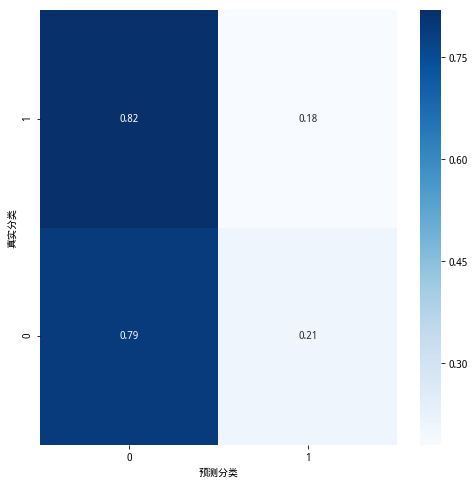

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_test_pred)

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=2)

# === plot ===
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 2)
plt.xlabel('预测分类')
plt.ylabel('真实分类')
plt.show()

In [270]:
y_test, y_test_pred

(array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0]))

In [271]:
model.predict_proba(x_test)[:10]

array([[0.5, 0.5],
       [1.0, 0.0],
       [0.5, 0.5],
       [0.16666666666666666, 0.8333333333333334],
       [0.8333333333333334, 0.16666666666666666],
       [0.4, 0.6],
       [1.0, 0.0],
       [0.6, 0.4],
       [1.0, 0.0],
       [1.0, 0.0]])

In [250]:
temp.columns[-1:].tolist()

['价格大幅下跌']

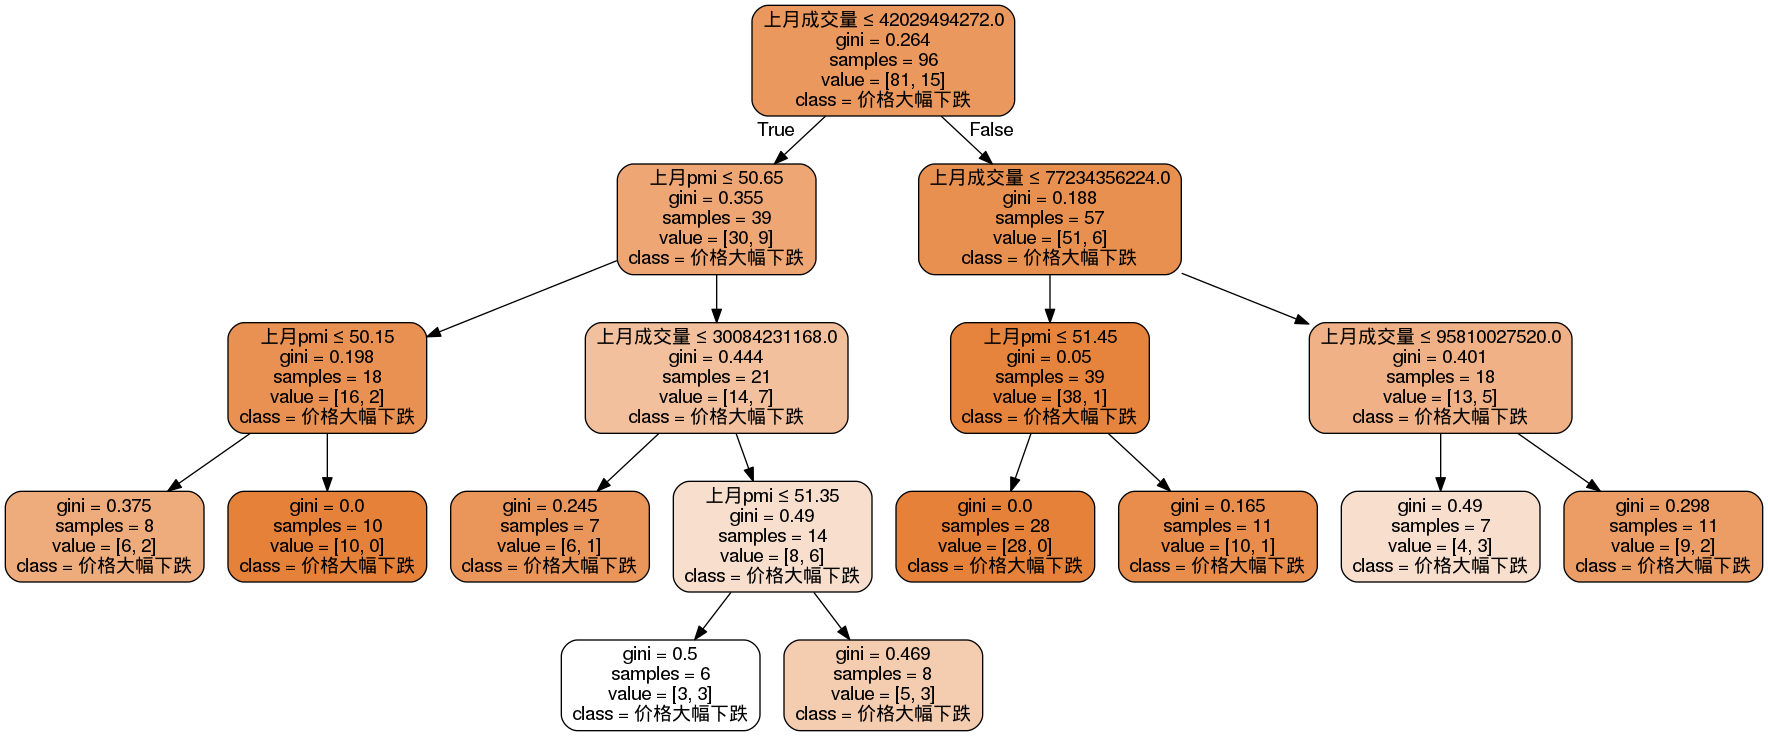

In [251]:
import pydotplus 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf") 

from IPython.display import Image  
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=temp.columns[:-1].tolist(),  
                     class_names=temp.columns[-1:].tolist(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 